<br><p style="font-family: Arial; font-size:2.5em;color:purple; font-style:bold">
Exploratory Data Analysis <br><br> <u>Haberman's Survival Data Set</u></p><br><br>

# Haberman's Survival Data
* Survival of patients who had undergone surgery for breast cancer
* The dataset can be found on the page: https://www.kaggle.com/gilsousa/habermans-survival-data-set

## About the data set:
* Column1: Age of the patient (Numerical)
* Column2: Operation year in 1900 (Numerical)
* Column3: Number of positive axillary nodes detected (Numerical)
* Column4: Survival Status (1--> Could survive more than 5 Yrars, 0--> Shall die with in 5 Years)

## Overall Objective:
* Classify a patient of breast cancer can survive or not

In [3]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read data from the csv file
case_data = pd.read_csv('haberman.csv',header=None)

# Necessary columns
data_columns = ['age', 'op_year', 'aux_node', 'survival_stat']
case_data.columns = data_columns # Add the columns

case_data.head() # View the data

,age,op_year,aux_node,survival_stat
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
'''
 Add 1900 to the `op_year` column.
 Map 1 --> Yes and 2--> No for the `survival_stat` column
 Above modifications are done for the understanding purpose
'''

case_data['op_year'] = case_data['op_year'] + 1900
case_data['survival_stat_temp'] = case_data['survival_stat'].map(lambda x: 'Yes' if x==1 else 'No')
case_data.drop(['survival_stat'], axis=1, inplace=True) # Drop the exising `survival_stat` column
case_data.columns = data_columns # Add the columns again

case_data.head()

,age,op_year,aux_node,survival_stat
0,30,1964,1,Yes
1,30,1962,3,Yes
2,30,1965,0,Yes
3,31,1959,2,Yes
4,31,1965,4,Yes


In [6]:
# Get the shape of the data-set
print(case_data.shape)

# Get the 'Survival Status' count per class
print(case_data['survival_stat'].value_counts()) # The data is almost balanced

(306, 4)
Yes    225
No      81
Name: survival_stat, dtype: int64


## Objective:
* To check the important attributes of the data

## 2-D Scatter plots (Using Pair Plots)

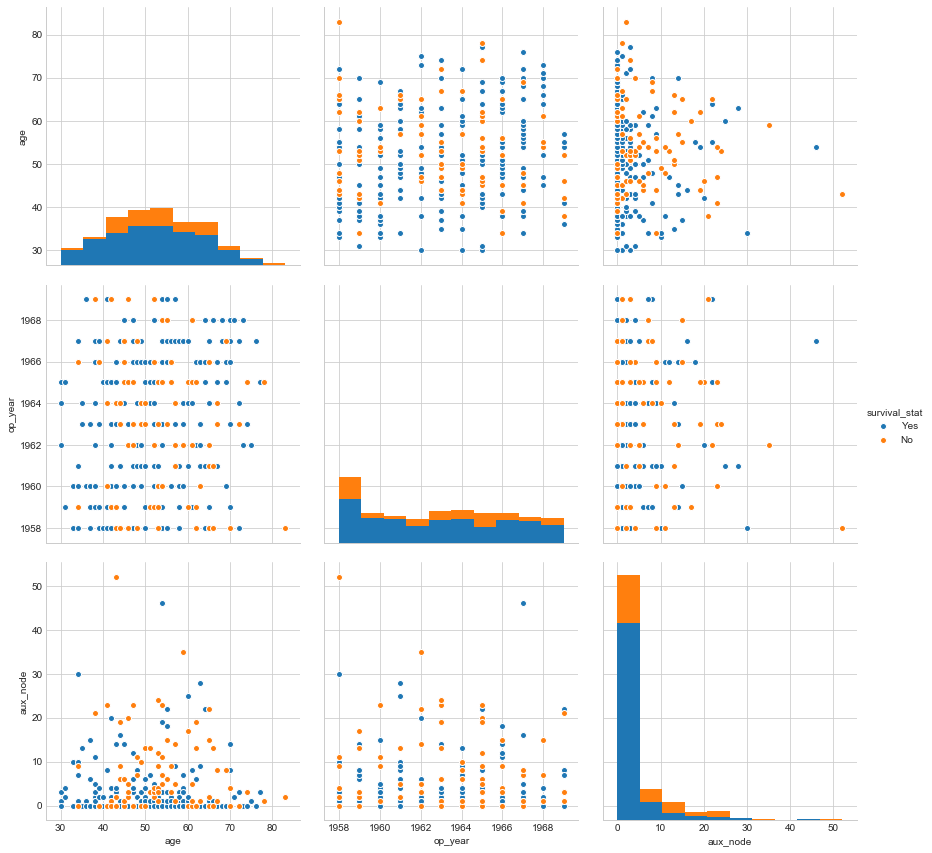

In [7]:
# Plotting using `seaborn` library
sns.set_style("whitegrid")
sns.pairplot(case_data, hue="survival_stat", size=4)
plt.show()

## Ovservations:
* From the above plots we can conclude that there is a huge overlapping between the categorical data `Survival Status`
* We can choose the plot between `year of treatment` (op_year) with the `positive auxiliary node` (aux_node)

## 1. Univariate analysis
* Single attribute to be validated using `Probability Density Function` (PDF) and `Cumulative Distribution Function` (CDF)

### PDF

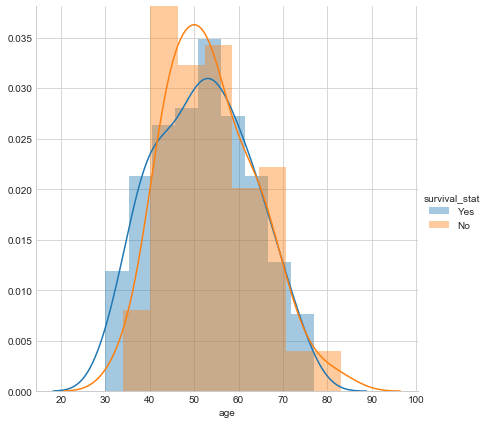

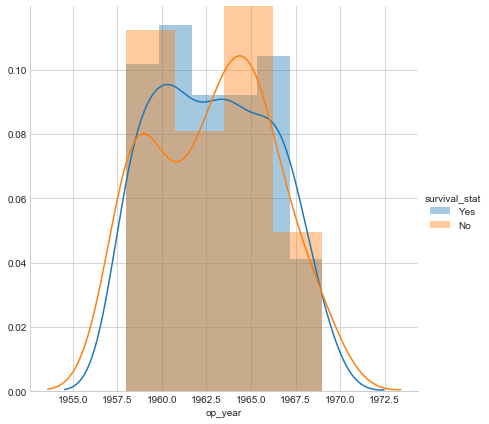

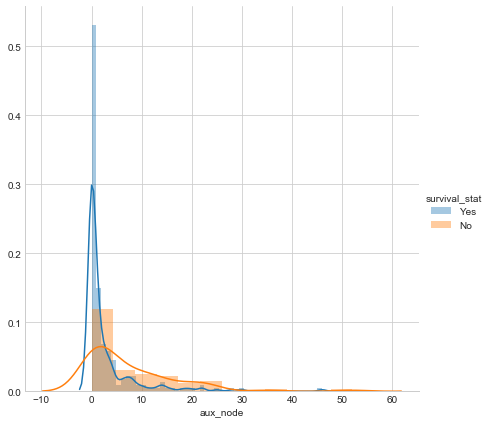

In [8]:
# Distribution plots of each attributes
independent_attribs = case_data.columns.tolist()[:-1] # Getting the independent attributes

for attrib in independent_attribs:
    sns.FacetGrid(case_data, hue="survival_stat", size=6)\
       .map(sns.distplot, attrib)\
       .add_legend()
    plt.show()

## Ovservation:
* The `Positive Auxiliary Node` (aux_node) attribute gives the better intution than the other two
* The `Positive Auxiliary Node` is highly dense at the interval of 0 to 4 (approximately)

### CDF

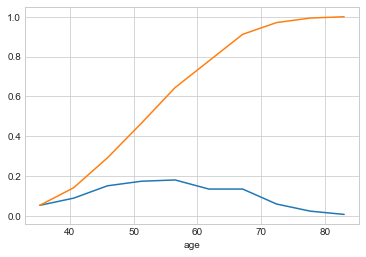

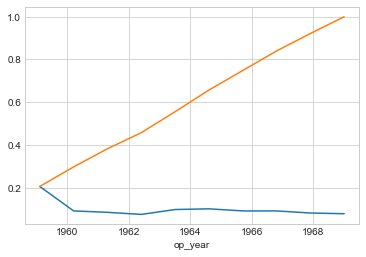

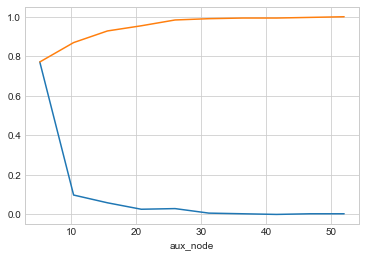

In [9]:
for attrib in independent_attribs:
    counts, bin_edges = np.histogram(case_data[attrib],bins=10, density = True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel(attrib)
    plt.show()

## Observation:
* From the `CDF` we can say that all most 80% patients have 0 to 4 `Positive Auxiliary Nodes`

## 2. Univariate analysis
* Single attribute to be validated using `Box Plot` and `Violin Plot`

### Box Plot

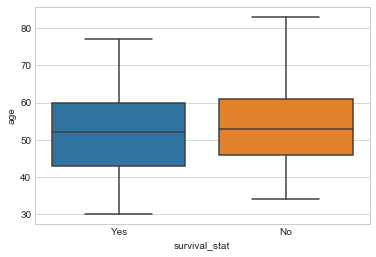

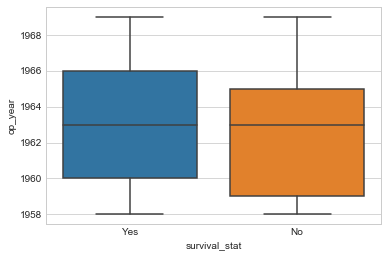

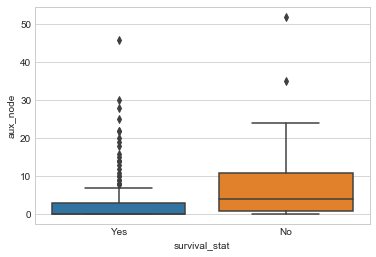

In [10]:
for attrib in independent_attribs:
    sns.boxplot(x="survival_stat", y=attrib, data=case_data)
    plt.show()

### Violin Plot

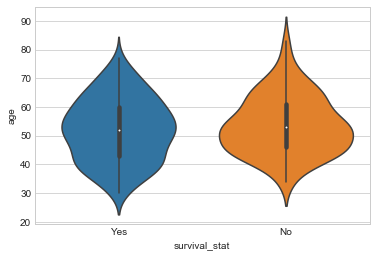

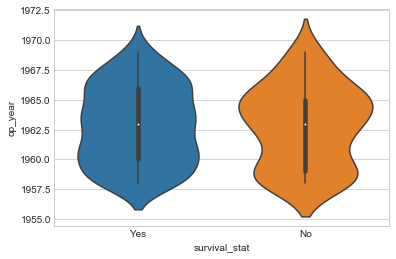

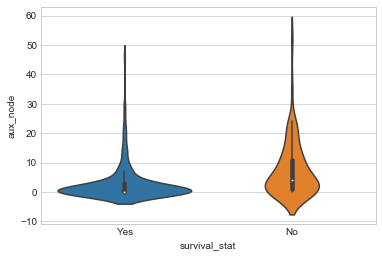

In [11]:
for attrib in independent_attribs:
    sns.violinplot(x="survival_stat", y=attrib, data=case_data, size=6)
    plt.show()

## Observation:
* Out of the three features `Positive Auxiliary Node` gives the better intution in this case also
* Perople who survived for more than 5 years, mainly have the nodes at the center or median ranging from 0 to 4
* People who did not survive they are having higher number of nodes.